<a href="https://colab.research.google.com/github/mreskandarinasab/Exploratory-Data-Analysis-on-Chronic-Kidney-Disease-Dataset/blob/main/chronic_kidney_disease_explored.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chronic Kidney Disease EDA

# Overview

1. The Chronic Kidney Disease Dataset consists of 24 features and one target variable. 
2. It is a **binary classification** problem
3. The numerical features include: 'age', 'blood_pressure', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count'

4. The categorical features include: 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'classification'

5. In this notebook, I present to you my exploration of this data. I have not done any pre processing yet. That will be coming up in my next notebook.

# Content

1. Features
2. Feature Descriptions
3. Renaming the columns 
4. Checking missing values
5. Unique values 
6. Fatures distribution
7. Correlations
>7.1 Positive Correlations
>7.2 Negative Correlations
8. Summary

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Download the data from kaggle
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mansoordaku/ckdisease")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mreskandarinasab
Your Kaggle Key: ··········


100%|██████████| 9.51k/9.51k [00:00<00:00, 6.86MB/s]

In [4]:
df = pd.read_csv('/content/ckdisease/kidney_disease.csv')

In [5]:
df.shape

(400, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [7]:
df.head().T

,0,1,2,3,4
id,0,1,2,3,4
age,48.0,7.0,62.0,48.0,51.0
bp,80.0,50.0,80.0,70.0,80.0
sg,1.02,1.02,1.01,1.005,1.01
al,1.0,4.0,2.0,4.0,2.0
su,0.0,0.0,3.0,0.0,0.0
rbc,NaN,NaN,normal,normal,normal
pc,normal,normal,normal,abnormal,normal
pcc,notpresent,notpresent,notpresent,present,notpresent
ba,notpresent,notpresent,notpresent,notpresent,notpresent


## 1. Features:

1. **age**		-	age
1. **bp**		-	blood pressure
1. **sg**		-	specific gravity
1. **al**		-   	albumin
1. **su**		-	sugar
1. **rbc**		-	red blood cells
1. **pc**		-	pus cell
1. **pcc**		-	pus cell clumps
1. **ba**		-	bacteria
1. **bgr**		-	blood glucose random
1. **bu**		-	blood urea
1. **sc**		-	serum creatinine
1. **sod**		-	sodium
1. **pot**		-	potassium
1. **hemo**		-	haemoglobin
1. **pcv**		-	packed cell volume
1. **wc**		-	white blood cell count
1. **rc**		-	red blood cell count
1. **htn**		-	hypertension
1. **dm**		-	diabetes mellitus
1. **cad**		-	coronary artery disease
1. **appet**		-	appetite
1. **pe**		-	pedal edema
1. **ane**		-	anemia
1. **classification**		-	class

## 2. Feature description

1. Age(numerical) --> age in years
1. Blood Pressure(numerical) bp in mm/Hg
1. Specific Gravity(nominal) sg - (1.005,1.010,1.015,1.020,1.025)
1. Albumin(nominal)al - (0,1,2,3,4,5)
1. Sugar(nominal) su - (0,1,2,3,4,5)
1. Red Blood Cells(nominal) rbc - (normal,abnormal)
1. Pus Cell (nominal)pc - (normal,abnormal)
1. Pus Cell clumps(nominal)pcc - (present,notpresent)
1. Bacteria(nominal) ba  - (present,notpresent)
1. Blood Glucose Random(numerical) bgr in mgs/dl
1. Blood Urea(numerical) bu in mgs/dl
1. Serum Creatinine(numerical) sc in mgs/dl
1. Sodium(numerical) sod in mEq/L
1. Potassium(numerical)	pot in mEq/L
1. Haemoglobin(numerical) hemo in gms
1. Packed  Cell Volume(numerical)
1. White Blood Cell Count(numerical) wc in cells/cumm
1. Red Blood Cell Count(numerical) rc in millions/cmm
1. Hypertension(nominal) htn - (yes,no)
1. Diabetes Mellitus(nominal) dm - (yes,no)
1. Coronary Artery Disease(nominal)	cad - (yes,no)
1. Appetite(nominal) ppet	 - (good,poor)
1. Pedal Edema(nominal)	pe - (yes,no)	
1. Anemia(nominal)ane	- (yes,no)
1. Class (nominal) class	 - (ckd,notckd)

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 3. Rename the columns to have meaningful names and checking dtypes

In [9]:
cols_names={"bp":"blood_pressure",
          "sg":"specific_gravity",
          "al":"albumin",
          "su":"sugar",
          "rbc":"red_blood_cells",
          "pc":"pus_cell",
          "pcc":"pus_cell_clumps",
          "ba":"bacteria",
          "bgr":"blood_glucose_random",
          "bu":"blood_urea",
          "sc":"serum_creatinine",
          "sod":"sodium",
          "pot":"potassium",
          "hemo":"haemoglobin",
          "pcv":"packed_cell_volume",
          "wc":"white_blood_cell_count",
          "rc":"red_blood_cell_count",
          "htn":"hypertension",
          "dm":"diabetes_mellitus",
          "cad":"coronary_artery_disease",
          "appet":"appetite",
          "pe":"pedal_edema",
          "ane":"anemia"}

df.rename(columns=cols_names, inplace=True)

In [10]:
print(f"So we have {df.shape[1]} columns and {df.shape[0]} instances")

So we have 26 columns and 400 instances


In [11]:
df.head().T

,0,1,2,3,4
id,0,1,2,3,4
age,48.0,7.0,62.0,48.0,51.0
blood_pressure,80.0,50.0,80.0,70.0,80.0
specific_gravity,1.02,1.02,1.01,1.005,1.01
albumin,1.0,4.0,2.0,4.0,2.0
sugar,0.0,0.0,3.0,0.0,0.0
red_blood_cells,NaN,NaN,normal,normal,normal
pus_cell,normal,normal,normal,abnormal,normal
pus_cell_clumps,notpresent,notpresent,notpresent,present,notpresent
bacteria,notpresent,notpresent,notpresent,notpresent,notpresent


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

As it can be seen, red_blood_cell_count, packed_cell_volume and white_blood_cell_count are object type. We need to change to numerical dtype.

In [13]:
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')


Let's drop the id column. id column is seems to be an unique identifier for each row so we are dropping that it won't help us to find any insights from the data

In [14]:
df.drop(["id"],axis=1,inplace=True) 

# 4. Checking missing values

In [15]:
df.isnull().sum().sort_values(ascending=False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
classification               0
dtype: int64

Evident that there are a lot of missing values. One very bad way would be to drop them. But I would be dealing with them in a smart way in my next notebook on Preprocessing. ;)

Let's also plot missing values percentage for all the features

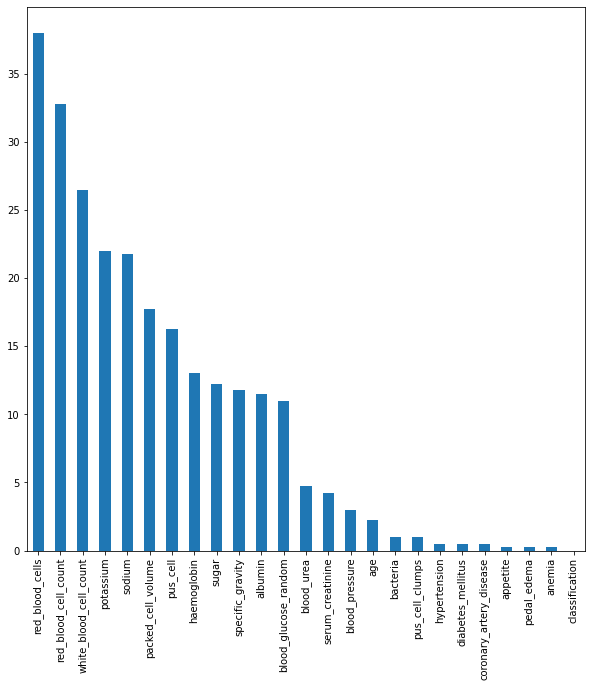

In [16]:
((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False).plot(kind='bar', figsize=(10,10))

# 5. Checking for Unique values and categorical features

In [17]:
for i in df.columns:
    print(f'{i} : {df[i].nunique()} values')

age : 76 values
blood_pressure : 10 values
specific_gravity : 5 values
albumin : 6 values
sugar : 6 values
red_blood_cells : 2 values
pus_cell : 2 values
pus_cell_clumps : 2 values
bacteria : 2 values
blood_glucose_random : 146 values
blood_urea : 118 values
serum_creatinine : 84 values
sodium : 34 values
potassium : 40 values
haemoglobin : 115 values
packed_cell_volume : 42 values
white_blood_cell_count : 89 values
red_blood_cell_count : 45 values
hypertension : 2 values
diabetes_mellitus : 5 values
coronary_artery_disease : 3 values
appetite : 2 values
pedal_edema : 2 values
anemia : 2 values
classification : 3 values


In [18]:
numerical_features = []
categorical_features = []

for i in df.columns:
    if df[i].nunique()>7:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

In [19]:
print('Numerical features: ', numerical_features)
print('\nCategorical features: ', categorical_features)

Numerical features:  ['age', 'blood_pressure', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']

Categorical features:  ['specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'classification']


Let's check for unique values in categorical features:

In [20]:
for feats in categorical_features:
    print(f'{feats} has {df[feats].unique()} categories.\n')

specific_gravity has [1.02  1.01  1.005 1.015   nan 1.025] categories.

albumin has [ 1.  4.  2.  3.  0. nan  5.] categories.

sugar has [ 0.  3.  4.  1. nan  2.  5.] categories.

red_blood_cells has [nan 'normal' 'abnormal'] categories.

pus_cell has ['normal' 'abnormal' nan] categories.

pus_cell_clumps has ['notpresent' 'present' nan] categories.

bacteria has ['notpresent' 'present' nan] categories.

hypertension has ['yes' 'no' nan] categories.

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] categories.

coronary_artery_disease has ['no' 'yes' '\tno' nan] categories.

appetite has ['good' 'poor' nan] categories.

pedal_edema has ['no' 'yes' nan] categories.

anemia has ['no' 'yes' nan] categories.

classification has ['ckd' 'ckd\t' 'notckd'] categories.



So we need to correct 2 features and the target variable which contain certain discrepancy in some values.

In [21]:
#Replace incorrect values
df['diabetes_mellitus'] = df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'})
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')
df['classification'] = df['classification'].replace(to_replace = 'ckd\t', value = 'ckd')

In [22]:
for feats in categorical_features:
    print(f'{feats} has {df[feats].unique()} categories.\n')

specific_gravity has [1.02  1.01  1.005 1.015   nan 1.025] categories.

albumin has [ 1.  4.  2.  3.  0. nan  5.] categories.

sugar has [ 0.  3.  4.  1. nan  2.  5.] categories.

red_blood_cells has [nan 'normal' 'abnormal'] categories.

pus_cell has ['normal' 'abnormal' nan] categories.

pus_cell_clumps has ['notpresent' 'present' nan] categories.

bacteria has ['notpresent' 'present' nan] categories.

hypertension has ['yes' 'no' nan] categories.

diabetes_mellitus has ['yes' 'no' nan] categories.

coronary_artery_disease has ['no' 'yes' nan] categories.

appetite has ['good' 'poor' nan] categories.

pedal_edema has ['no' 'yes' nan] categories.

anemia has ['no' 'yes' nan] categories.

classification has ['ckd' 'notckd'] categories.



Looks good now apart from the NaNs

# 6. Checking features distribution

Let's first check distribution of the numerical features

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

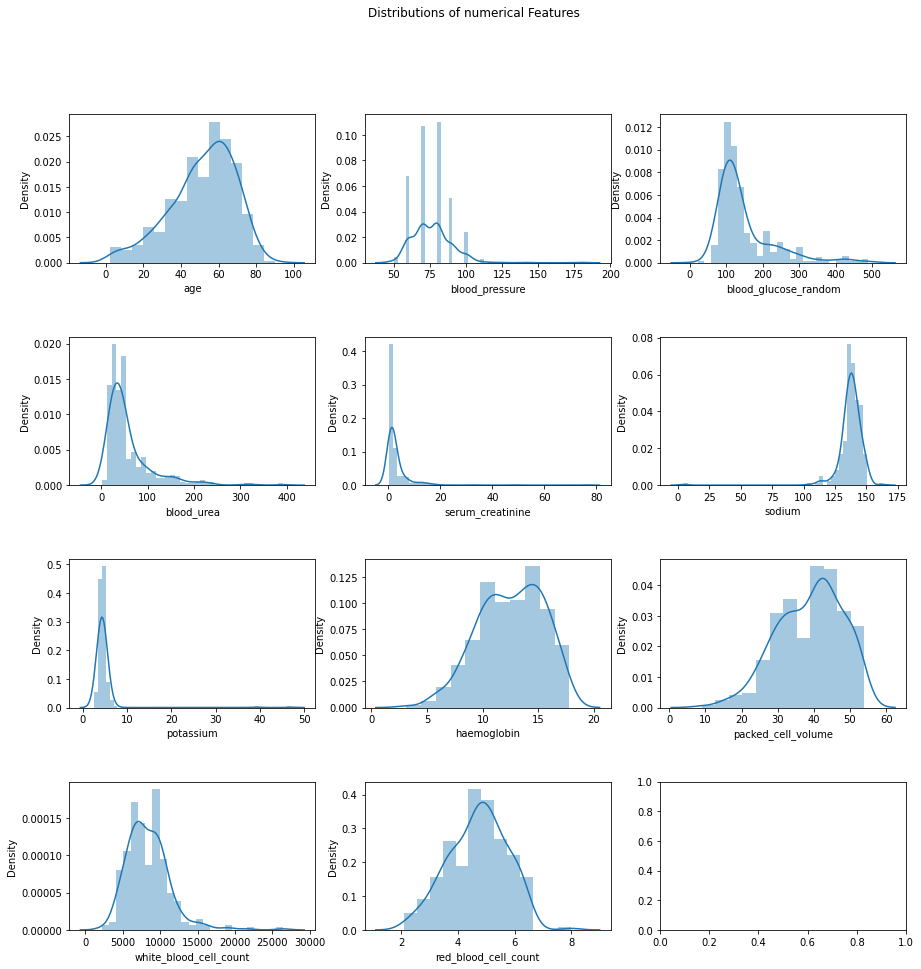

In [23]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of numerical Features')


for ax, feats in zip(axes.flatten(), numerical_features):
    sns.distplot(a=df[feats], ax=ax)

### Observations:
1. age looks a bit left skewed
2. Blood gluscose random is right skewed
3. Blood Urea is also a bit right skewed
4. Rest of the features are lightly skewed. 
>I will be standardizing them in pre processing notebook to see their distributions then.

Now, let's check the label distribution for categorical data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

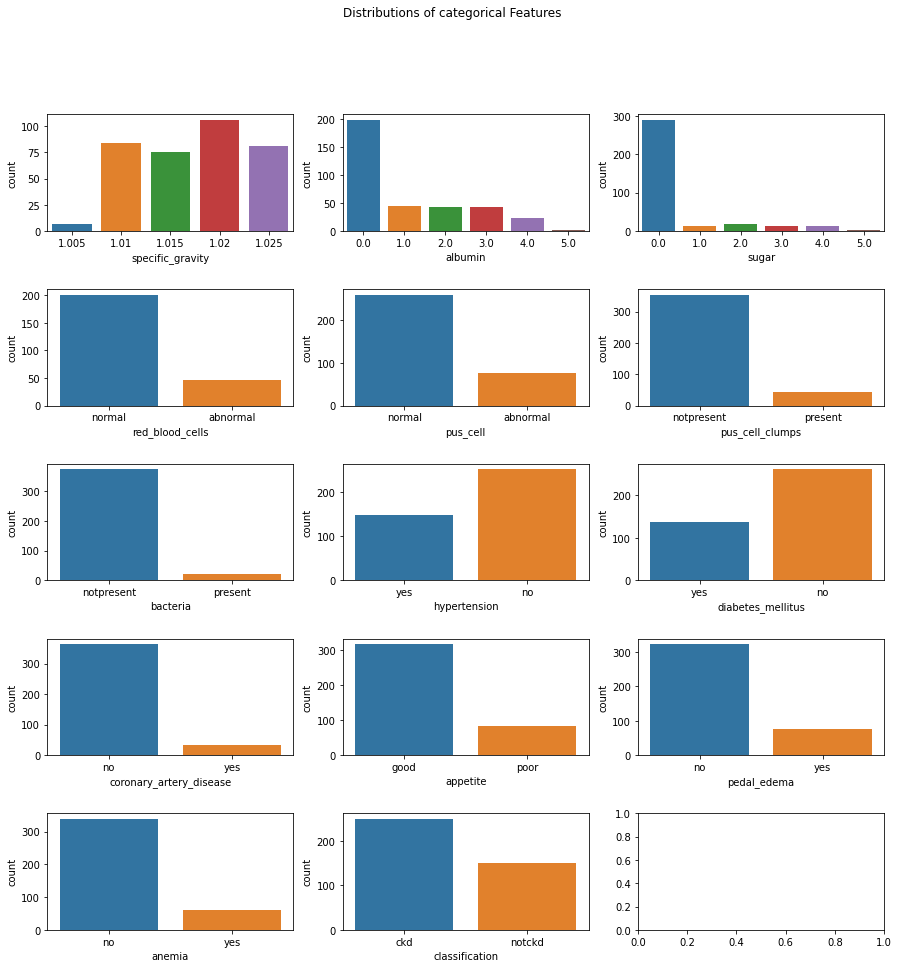

In [24]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of categorical Features')


for ax, feats in zip(axes.flatten(), categorical_features):
    sns.countplot(df[feats], ax=ax)

A few features have imbalanced categories. Stratified folds will be necessary while cross validation.

Let's also check for class imbalance, if any

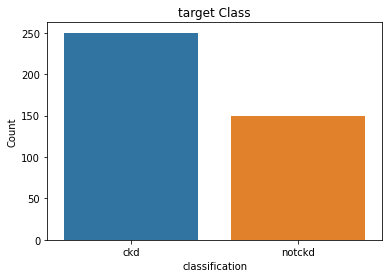

Percent of chronic kidney disease sample:  62.5 %
Percent of not a chronic kidney disease sample:  37.5 %


In [25]:
sns.countplot(x='classification',data=df)
plt.xlabel("classification")
plt.ylabel("Count")
plt.title("target Class")
plt.show()
print('Percent of chronic kidney disease sample: ',round(len(df[df['classification']=='ckd'])/len(df['classification'])*100,2),"%")
print('Percent of not a chronic kidney disease sample: ',round(len(df[df['classification']=='notckd'])/len(df['classification'])*100,2),"%")

Evidently, the classes are not much imbalanced.

# 7. Correlations

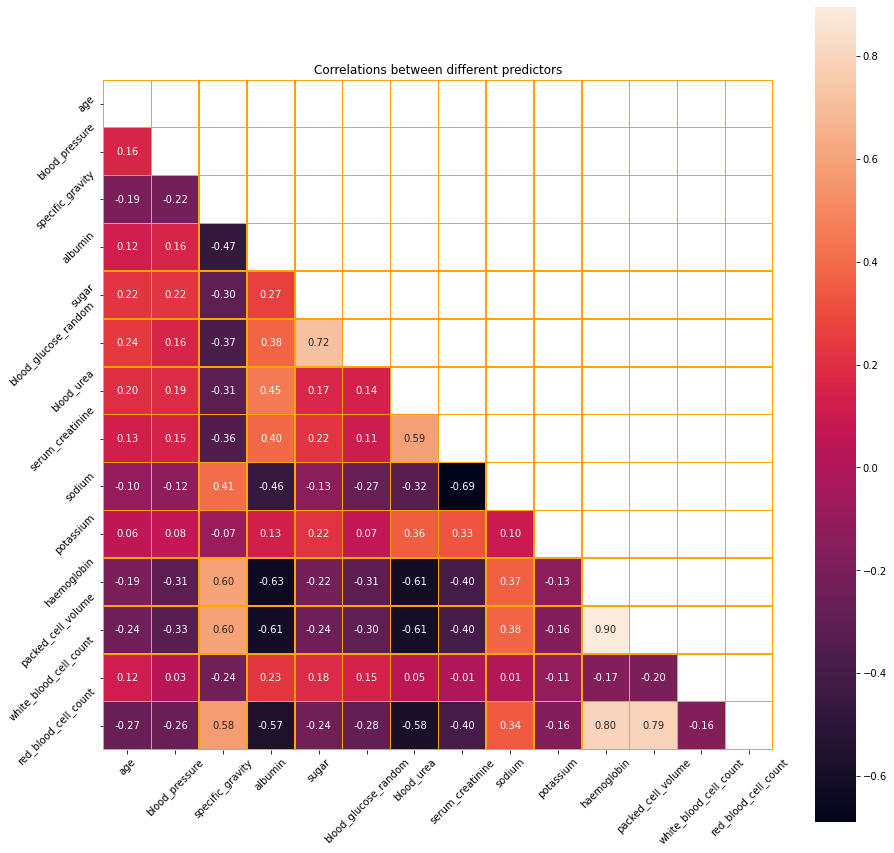

In [26]:
corr_df = df.corr()
f,ax=plt.subplots(figsize=(15,15))
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_df,annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange", mask = mask, square=True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Correlations between different predictors')
plt.show()

### Positive Correlation:
1. Specific gravity -> Red blood cell count, Packed cell volume and Hemoglobin
2. Sugar -> Blood glucose random
3. Blood Urea -> Serum creatinine
4. Hemoglobin -> Red Blood cell count <- packed cell volume

### Negative Correlation:
1. Albumin, Blood urea -> Red blood cell count, packed cell volume, Hemoglobin
2. Serum creatinine -> Sodium

## 7.1 Let's check for Positive correlation and its impact on classes

In [27]:
import plotly.express as px

In [28]:
# Defining violin and scatter plot functions
def violin(col):
    fig = px.violin(df, y=col, x="classification", color="classification", box=True, points="all", hover_data=df.columns)
    return fig.show()

def scatters(col1,col2):
    fig = px.scatter(df, x=col1, y=col2, color="classification")
    fig.show()

In [29]:
scatters('red_blood_cell_count', 'packed_cell_volume')

In [30]:
scatters('red_blood_cell_count', 'haemoglobin')

In [31]:
scatters('haemoglobin','packed_cell_volume')

## Observations:
1. RBC count range ~2 to <4.5 and Hemoglobin between 3 to <13 are mostly classified as positive for chronic kidney disease(i.e ckd).
2. RBC count range >4.5 to ~6.1 and Hemoglobin between >13 to 17.8 are classified as negative for chronic kidney disease(i.e nockd).
3. Hemoglobin > 13, mostly classified as not ckd

In [32]:
violin('red_blood_cell_count')

One outlier seems to be there. But can't assert that it really is an outlier. Hence won't drop

In [33]:
violin('packed_cell_volume')

In [34]:
violin('haemoglobin')

These seem to be good

In [35]:
violin('serum_creatinine')

Serum creatinine has got about 2 seemingly outliers

## 7.2 Now let's check for negative correlation and its impact on classes

### Albumin, Blood urea -> Red blood cell count, packed cell volume, Haemoglobin

In [36]:
scatters('red_blood_cell_count','albumin')

Clearly, albumin levels of above 0 affect ckd largely

In [37]:
scatters('packed_cell_volume','blood_urea')

Packed cell volume >= 40 largely affects to be non ckd

In [38]:
scatters('haemoglobin','blood_urea')

In [39]:
scatters('red_blood_cell_count','packed_cell_volume')

In [40]:
fig = px.bar(df, x="specific_gravity", y="packed_cell_volume",
             color='classification', barmode='group',
             height=400)
fig.show()

Clearly, specific gravity >=1.02 affects non ckd

### Sodium and serum_creatinine

In [41]:
scatters('serum_creatinine','sodium')

Very evidently, sodium above 135 and serum creatinine less than 1.3 are non ckd

In [42]:
import missingno as msno

In [43]:
%matplotlib inline

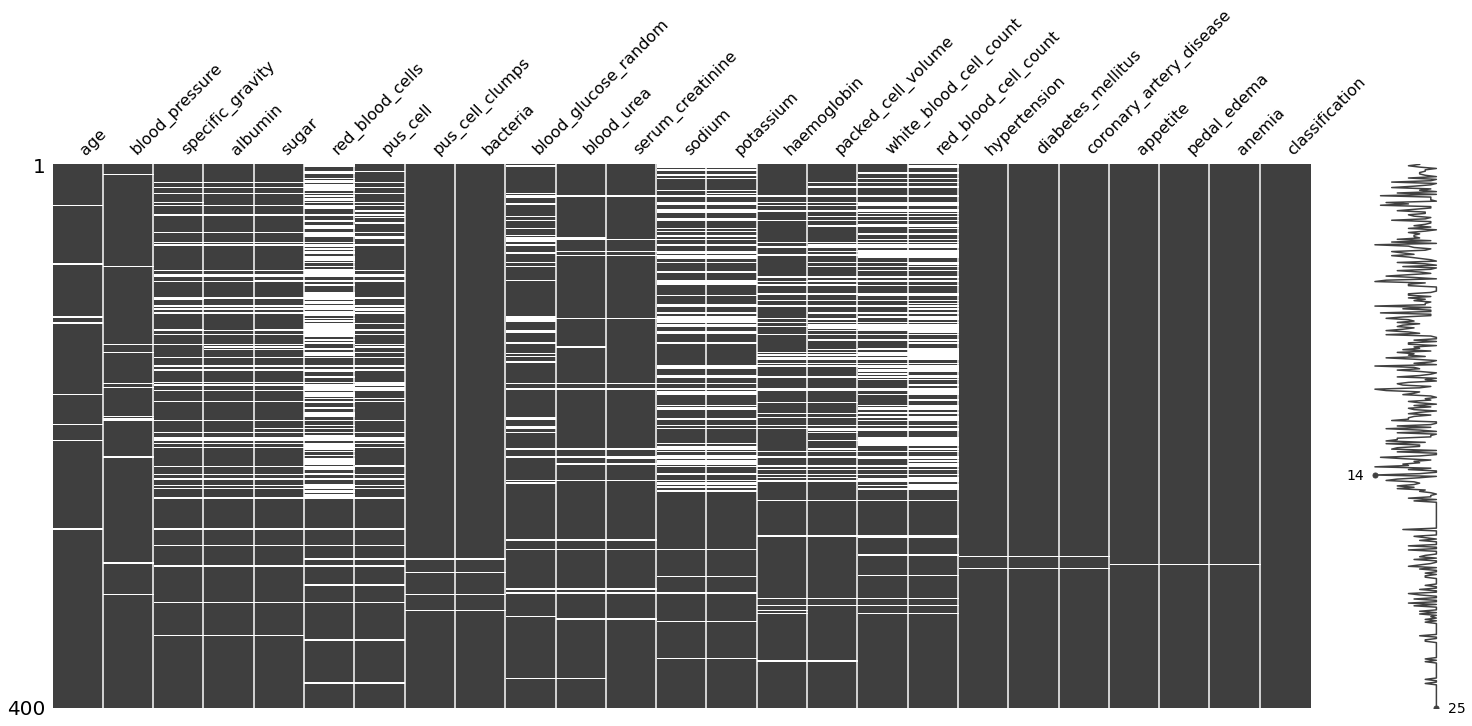

In [44]:
fig = msno.matrix(df)

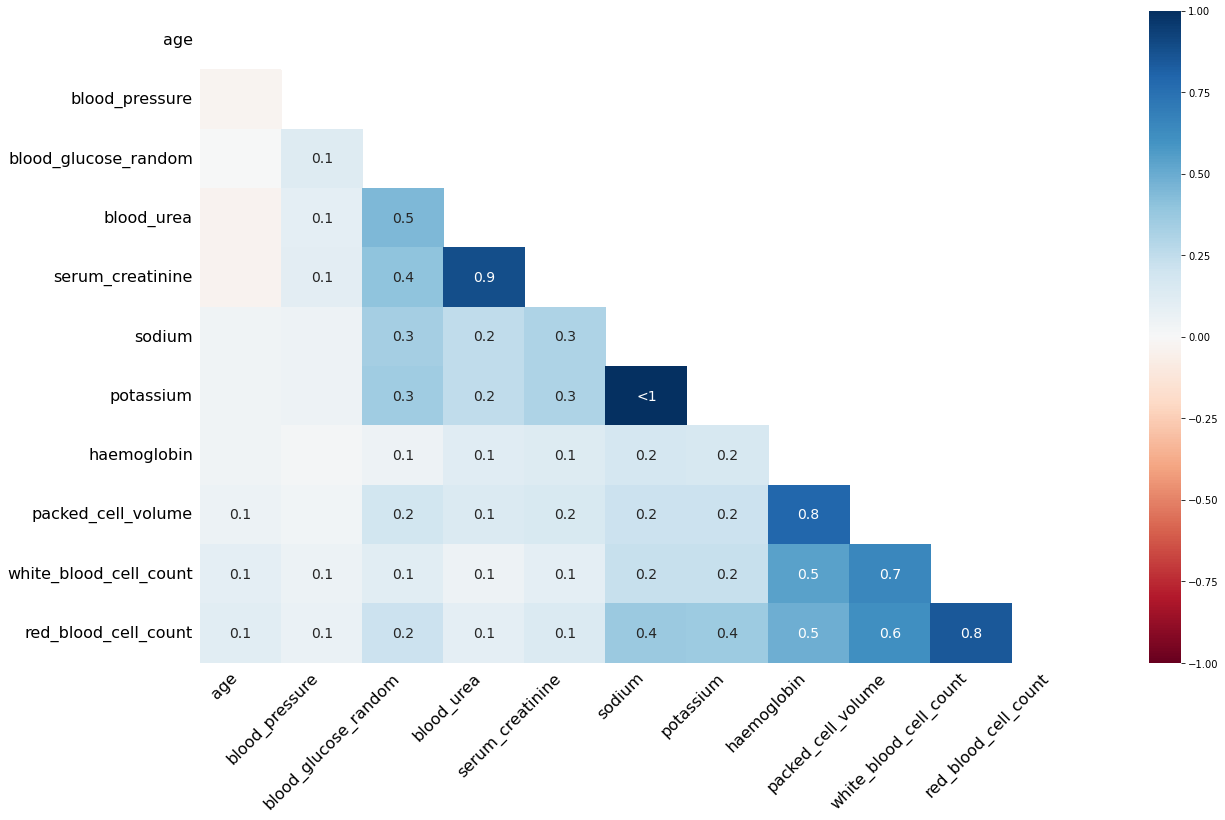

In [45]:
msno.heatmap(df[numerical_features])

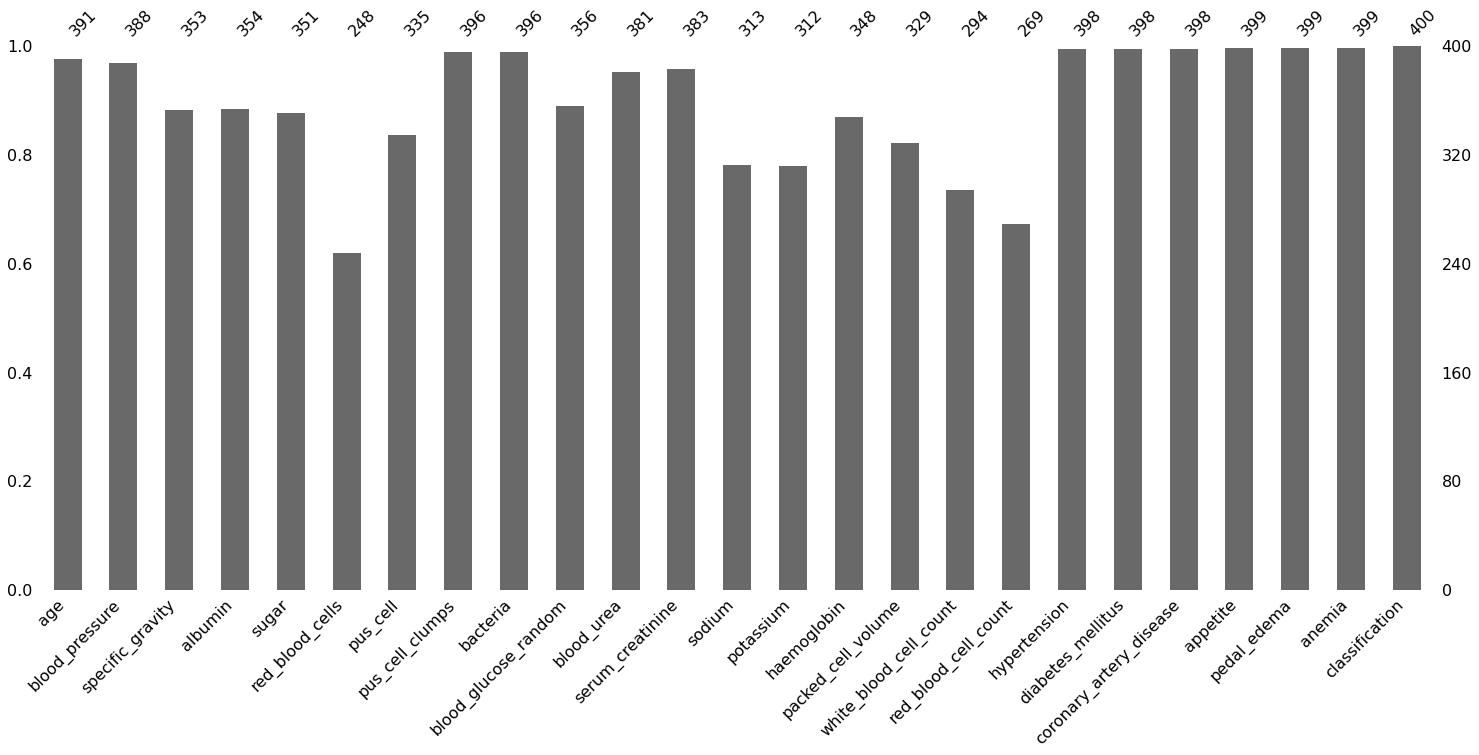

In [46]:
msno.bar(df)

# 8. Summary:
1. A lot of features have missing values, which will be imputed smartly in my next notebook dedicated specially to pre-processing.
2. Categorical features are in majority which will be label encoded.
3. A few features are skewed a bit that will be standardized and fixed.
4. The features which have the max impact on output are Haemoglobin, Albumin, red_blood_cell_count
5. Features like packed_cell_volume, serum_creatinine, urea, haemoglobin have a strong correlation with the output classes.
6. I'll also be trying out different ways to get max performance out of the available data.